In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [4]:
df.shape

(907, 27)

In [5]:
df.drop(columns=["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2','other_fuel1',
                 'estimated_generation_gwh','wepp_id','generation_gwh_2013','generation_gwh_2019'],axis=1,inplace=True)

In [6]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [8]:
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].median())
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df['generation_gwh_2018'] = df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean())
df['generation_data_source'] = df['generation_data_source'].fillna(df['generation_data_source'].mode()[0])

In [9]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,2001.0,Ultratech Cement ltd,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,2001.0,CDM,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [10]:
df.isnull().sum()

name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
source                    0
geolocation_source        0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [11]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1998.728776,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.815073,13.158621,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1998.000000,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.719500,2001.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2003.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


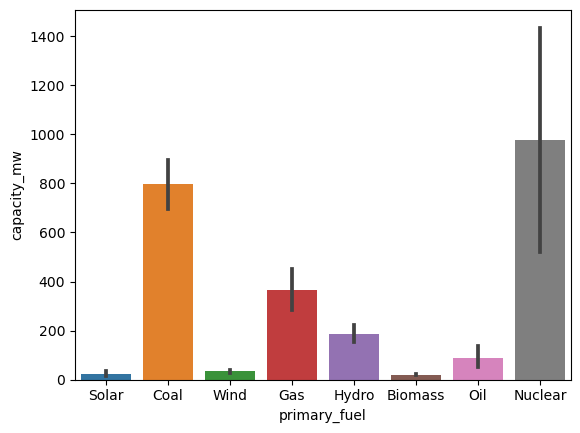

In [12]:
ax = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)

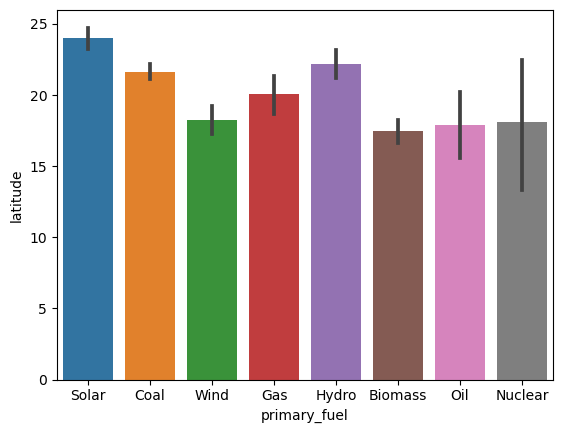

In [13]:
ax = sns.barplot(x = "primary_fuel", y = "latitude", data = df)

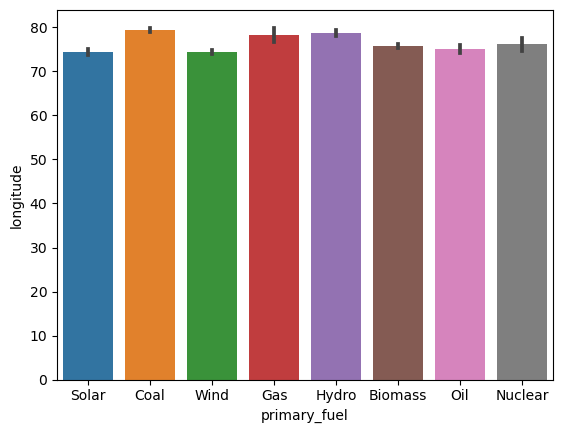

In [14]:
ax = sns.barplot(x = "primary_fuel", y = "longitude", data = df)

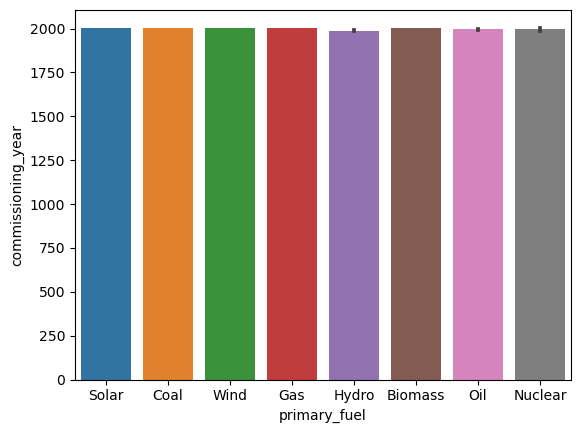

In [15]:
ax = sns.barplot(x = "primary_fuel", y = "commissioning_year", data = df)

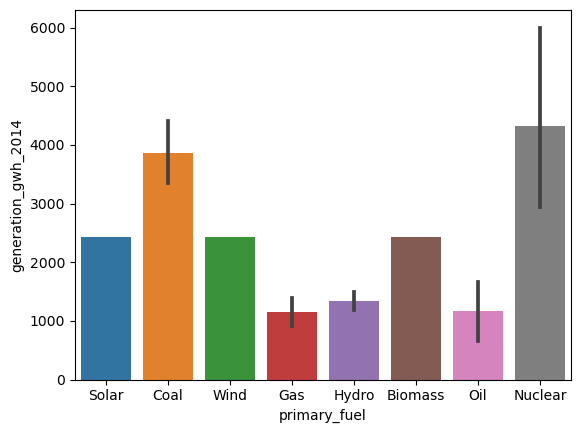

In [16]:
ax = sns.barplot(x = "primary_fuel", y = "generation_gwh_2014", data = df)

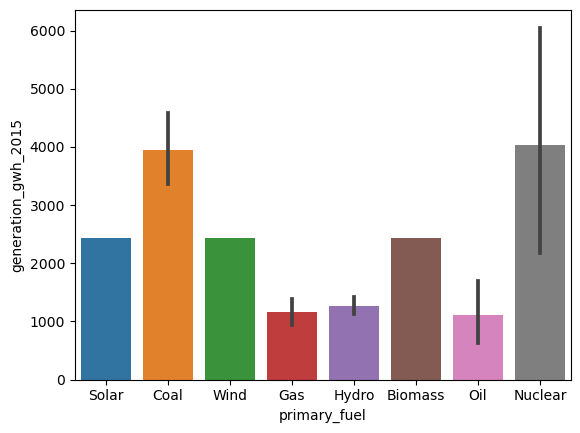

In [17]:
ax = sns.barplot(x = "primary_fuel", y = "generation_gwh_2015", data = df)

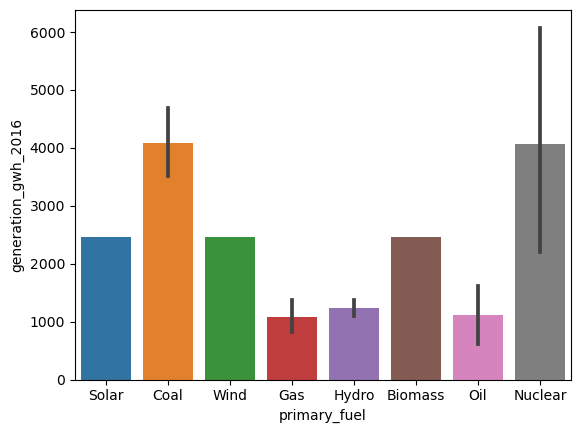

In [18]:
ax = sns.barplot(x = "primary_fuel", y = "generation_gwh_2016", data = df)

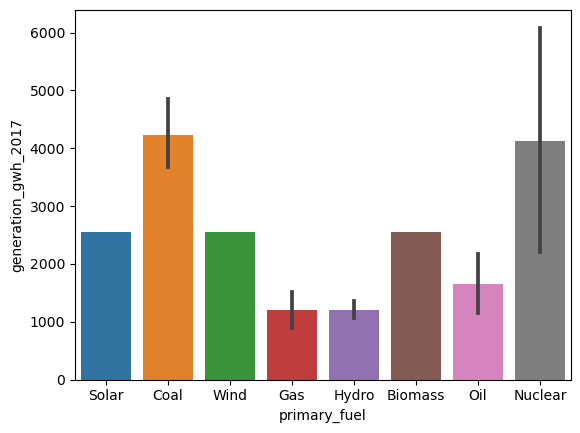

In [19]:
ax = sns.barplot(x = "primary_fuel", y = "generation_gwh_2017", data = df)

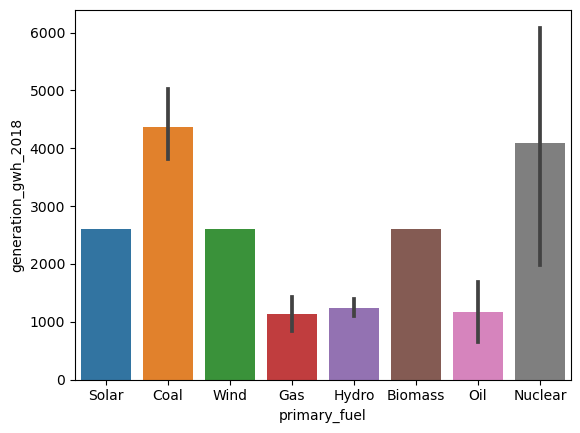

In [20]:
ax = sns.barplot(x = "primary_fuel", y = "generation_gwh_2018", data = df)

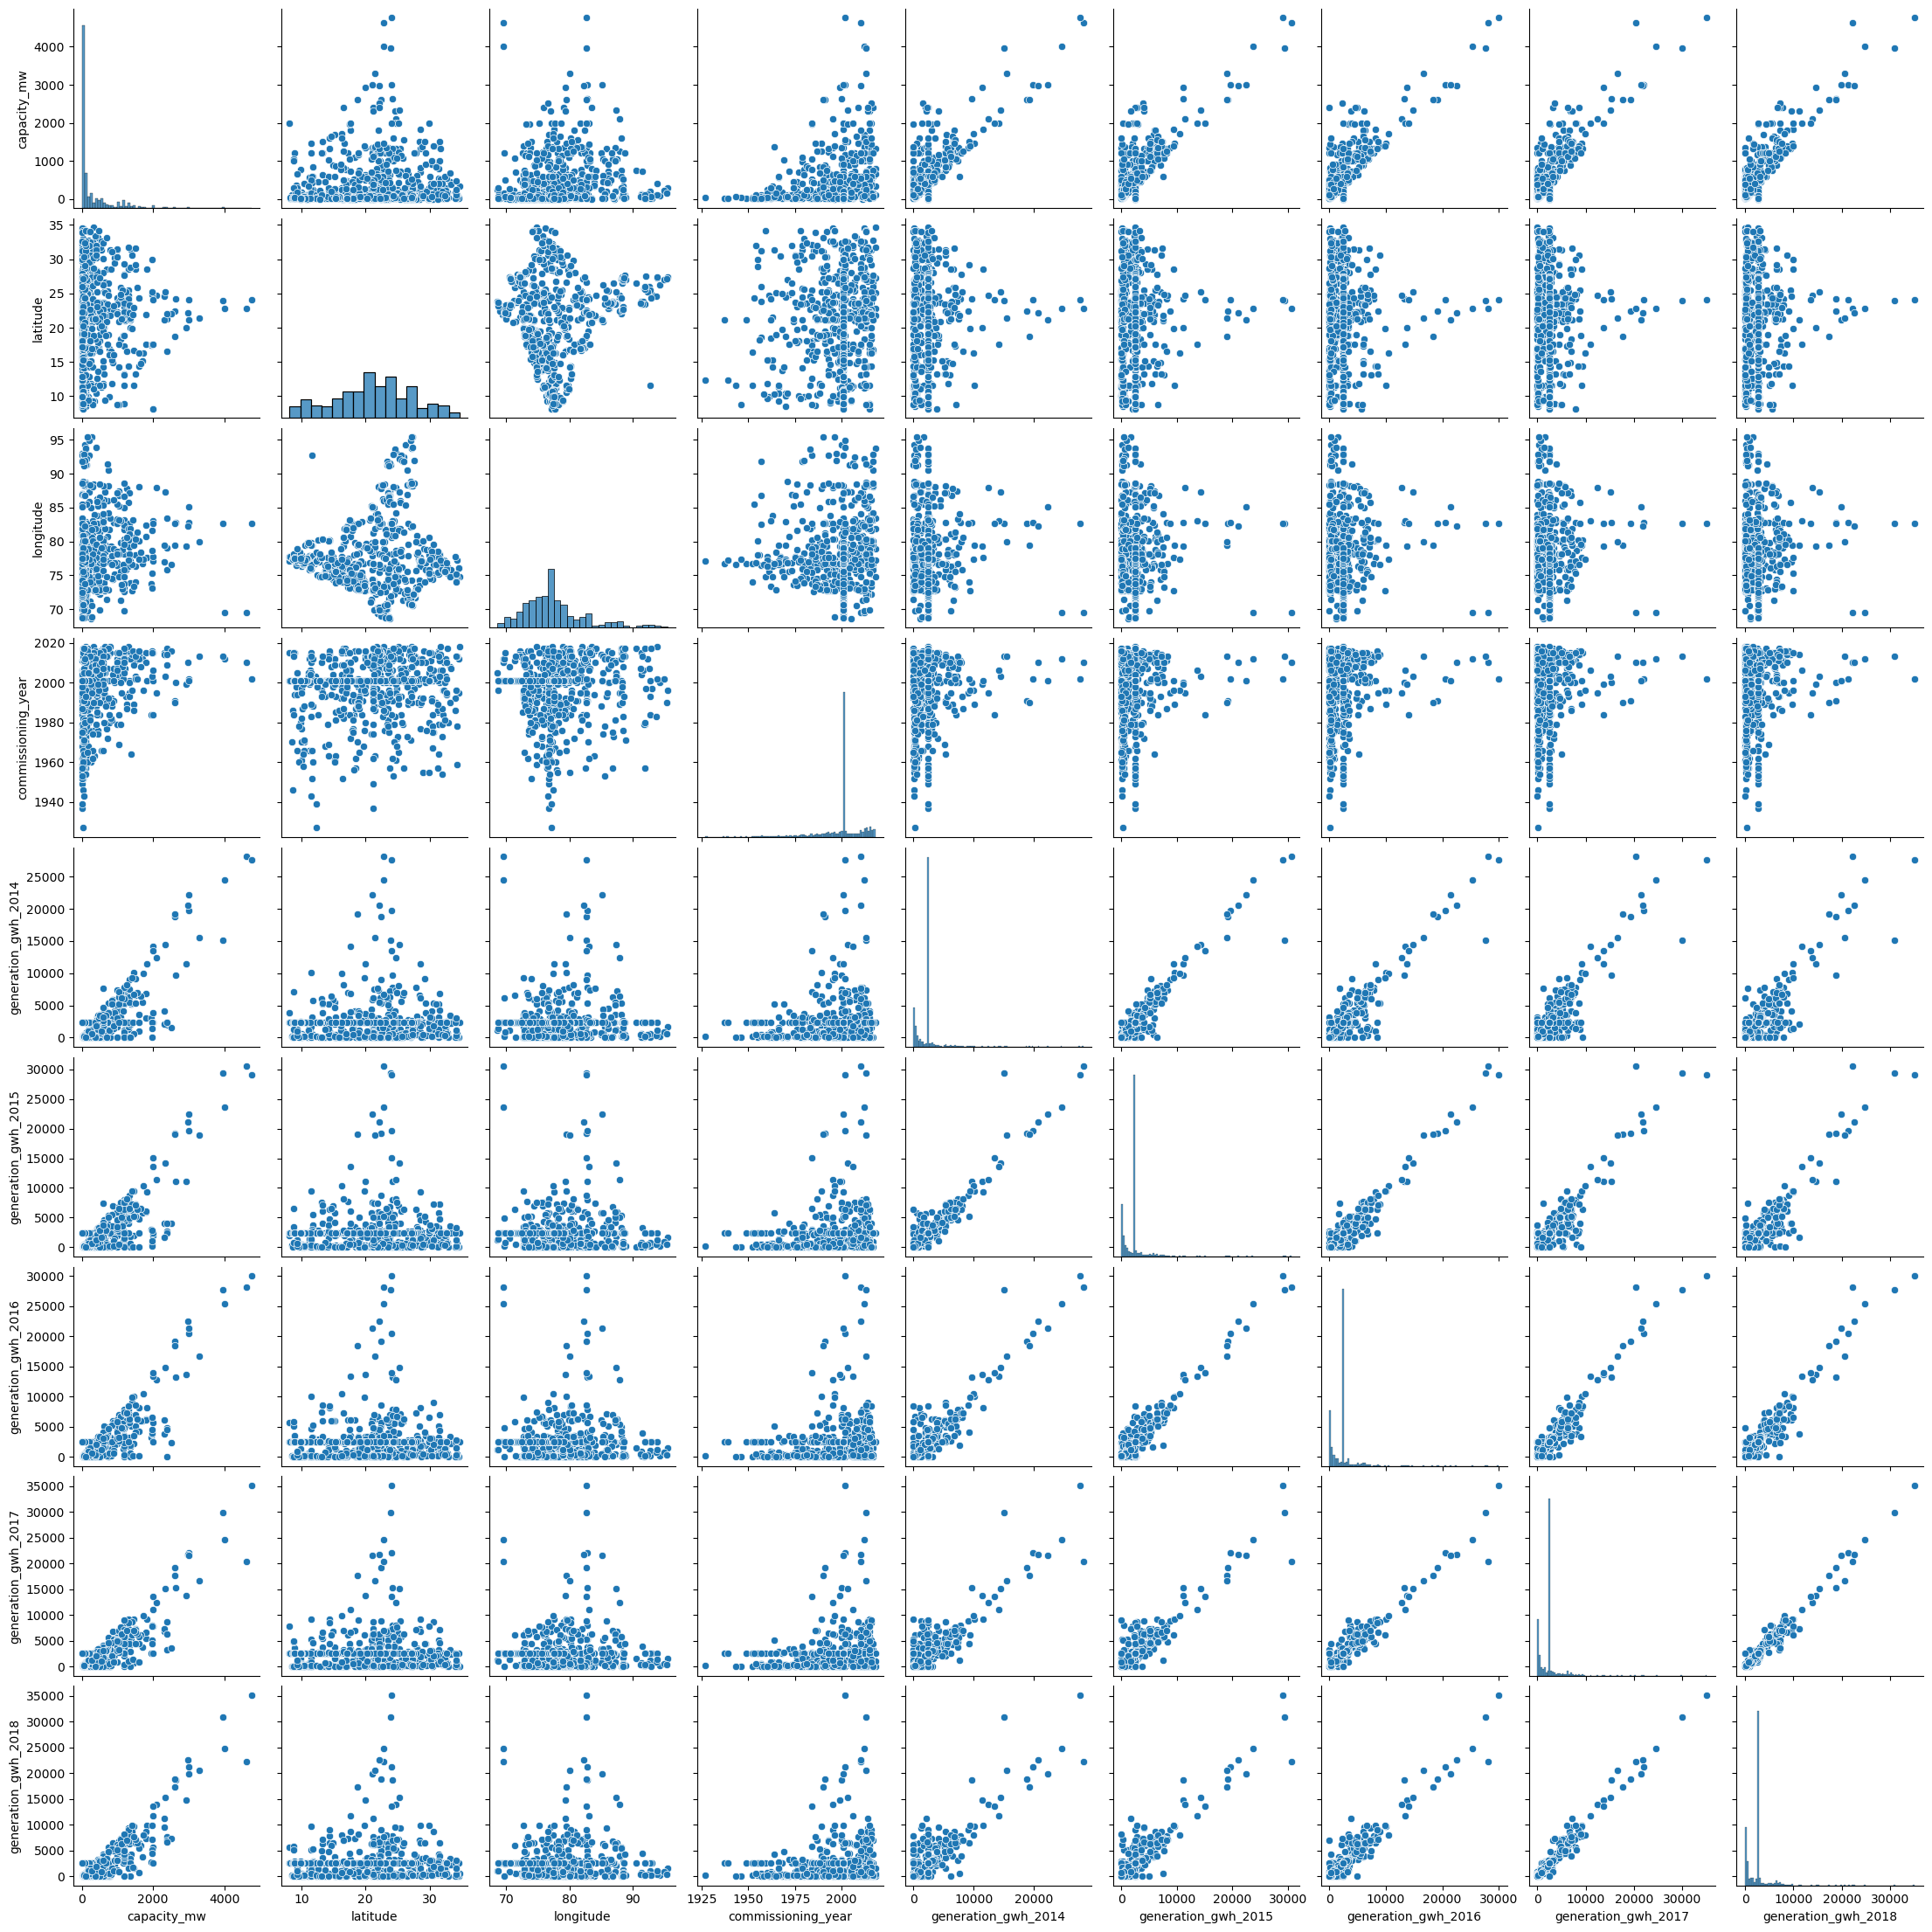

In [26]:
sns.pairplot(data=df)
plt.show()

In [27]:
df.drop(columns=['name'],axis=1,inplace=True)

In [28]:
Category=['primary_fuel', 'source', 'geolocation_source', 'generation_data_source']

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,6,2011.0,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
1,98.0,24.7663,74.6090,1,2001.0,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
2,39.2,21.9038,69.3732,7,2001.0,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
3,135.0,23.8712,91.3602,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,1800.0,21.9603,82.4091,1,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0


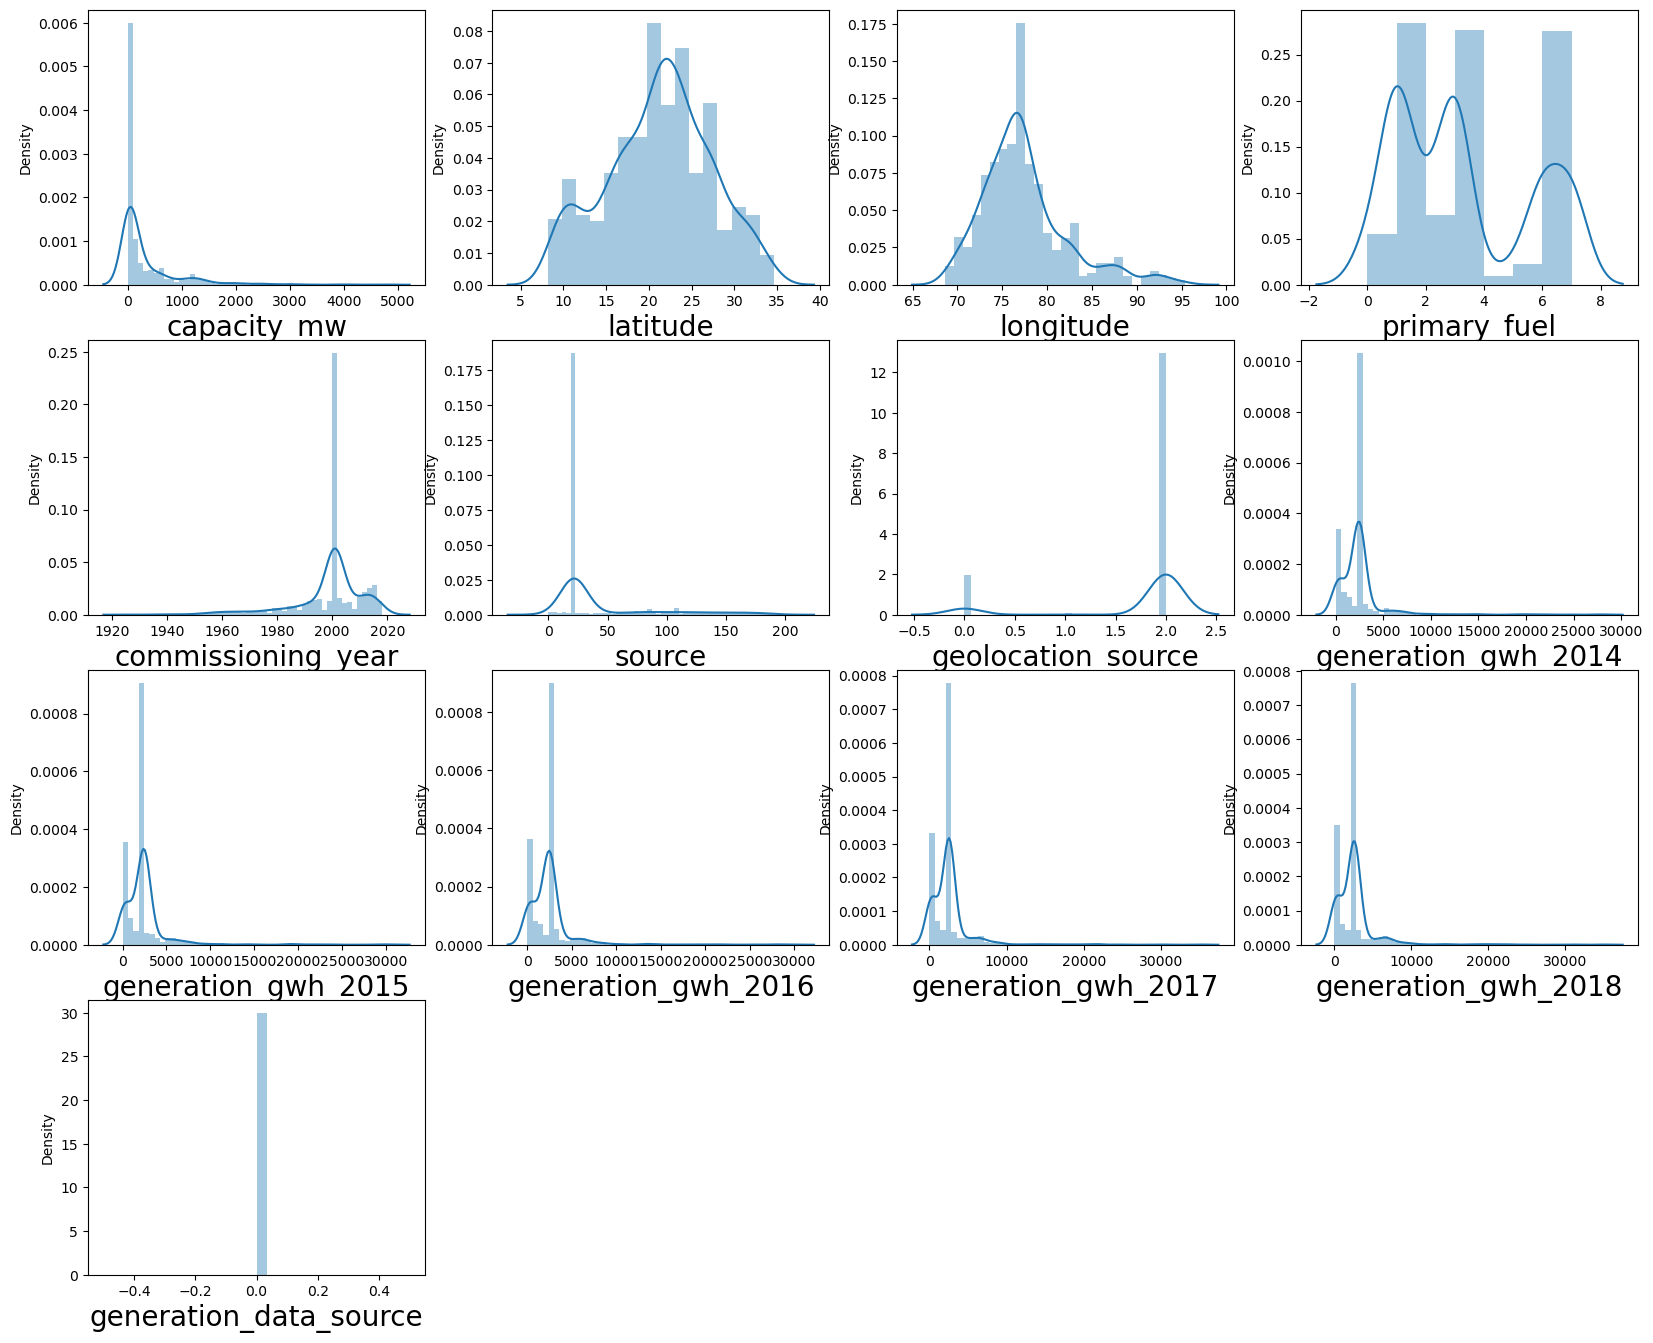

In [30]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<=18:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()

In [32]:
df.skew()

capacity_mw               3.123576
latitude                 -0.149698
longitude                 1.163320
primary_fuel              0.472251
commissioning_year       -1.719575
source                    1.827373
geolocation_source       -2.159841
generation_gwh_2014       5.035446
generation_gwh_2015       5.364134
generation_gwh_2016       5.068427
generation_gwh_2017       5.110952
generation_gwh_2018       4.937907
generation_data_source    0.000000
dtype: float64

In [33]:
df[['longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]=np.cbrt(df[['longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']])

In [34]:
df.skew()

capacity_mw               3.123576
latitude                 -0.149698
longitude                 1.024844
primary_fuel              0.472251
commissioning_year       -1.739905
source                    1.827373
geolocation_source       -2.159841
generation_gwh_2014      -0.371187
generation_gwh_2015      -0.269579
generation_gwh_2016      -0.279323
generation_gwh_2017      -0.331857
generation_gwh_2018      -0.316915
generation_data_source    0.000000
dtype: float64

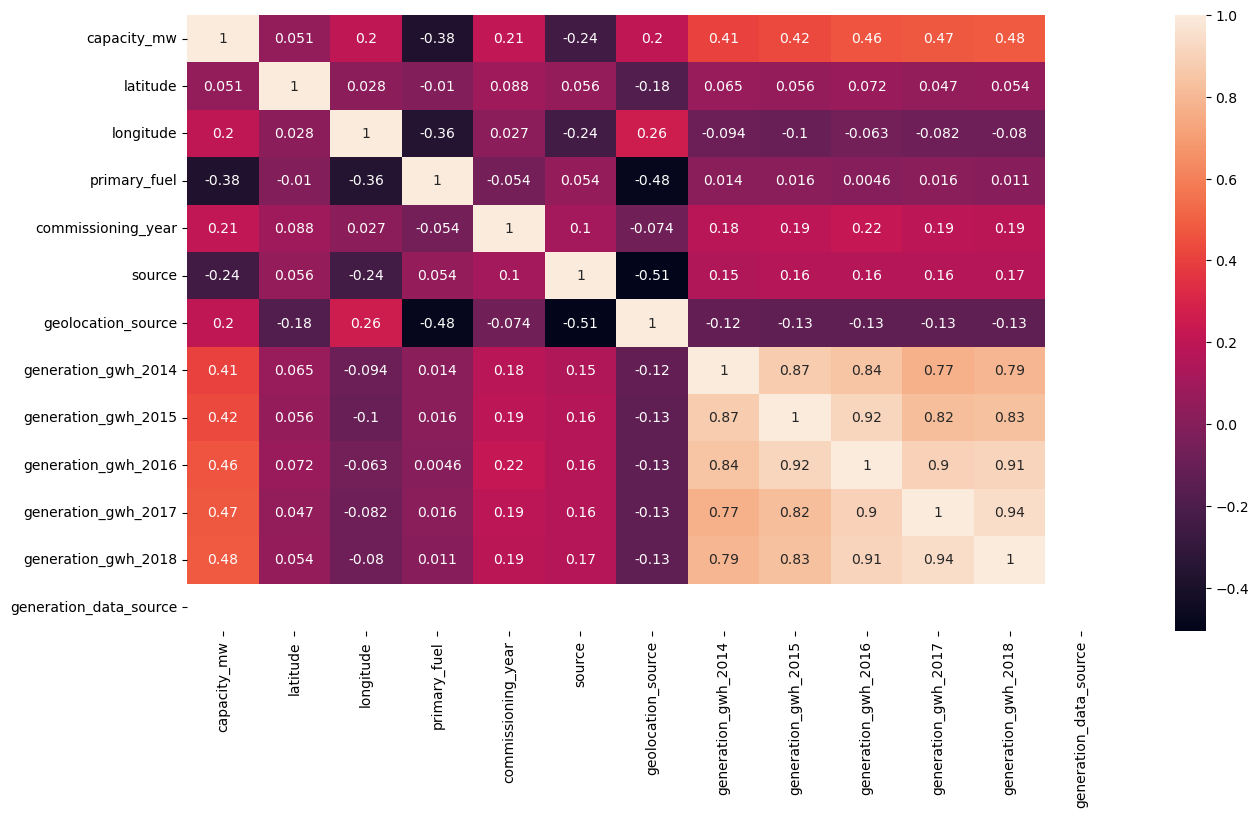

In [35]:
plt.figure(figsize=(15,8))

sns.heatmap(df.corr(),annot=True)

plt.show()

In [36]:
x = df.drop('primary_fuel',axis=1)
y = df['primary_fuel']

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif['Features'] = x.columns

vif

,vif,Features
0,1.676600,capacity_mw
1,1.056939,latitude
2,1.153389,longitude
3,1.099592,commissioning_year
4,1.492860,source
5,1.463853,geolocation_source
6,4.480636,generation_gwh_2014
7,8.202253,generation_gwh_2015
8,12.250131,generation_gwh_2016
9,10.172744,generation_gwh_2017


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [40]:
maxAccu=0
maxRS=0
for i in range(0,500):
    x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8168498168498168 on Random_state 152


In [41]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.30, random_state=152)

In [42]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n==================Train Result=====================')
        print(f'Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print('\n==================Test Result======================')
        print(f'Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%')
        
        
        print('\n Classification Report', classification_report(y_test,pred,digits=2))

In [43]:
Lr = LogisticRegression()
Lr.fit(x_train,y_train)

LogisticRegression()

In [44]:
metric_score(Lr,x_train,x_test,y_train,y_test, train = True)
metric_score(Lr,x_train,x_test,y_train,y_test,train= False)


==================Train Result=====================
Accuracy Score: 73.66%

==================Test Result======================
Accuracy Score: 81.68%

 Classification Report               precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.84      0.82      0.83        77
           2       0.67      0.24      0.35        17
           3       0.71      0.82      0.76        73
           4       0.00      0.00      0.00         3
           5       1.00      0.20      0.33         5
           6       1.00      1.00      1.00        42
           7       0.82      0.98      0.89        43

    accuracy                           0.82       273
   macro avg       0.73      0.61      0.62       273
weighted avg       0.81      0.82      0.80       273



In [45]:
Dt = DecisionTreeClassifier()
Dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
metric_score(Dt,x_train,x_test,y_train,y_test, train = True)
metric_score(Dt,x_train,x_test,y_train,y_test,train= False)


==================Train Result=====================
Accuracy Score: 100.00%

==================Test Result======================
Accuracy Score: 82.78%

 Classification Report               precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.81      0.79      0.80        77
           2       0.26      0.29      0.28        17
           3       0.82      0.88      0.85        73
           4       0.50      0.33      0.40         3
           5       0.40      0.40      0.40         5
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        43

    accuracy                           0.83       273
   macro avg       0.71      0.66      0.68       273
weighted avg       0.83      0.83      0.83       273



In [47]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [48]:
metric_score(knn,x_train,x_test,y_train,y_test, train = True)
metric_score(knn,x_train,x_test,y_train,y_test,train= False)


==================Train Result=====================
Accuracy Score: 83.28%

==================Test Result======================
Accuracy Score: 80.95%

 Classification Report               precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       0.77      0.79      0.78        77
           2       0.33      0.18      0.23        17
           3       0.79      0.81      0.80        73
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       1.00      1.00      1.00        42
           7       0.86      1.00      0.92        43

    accuracy                           0.81       273
   macro avg       0.56      0.60      0.58       273
weighted avg       0.77      0.81      0.79       273



In [49]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [50]:
metric_score(RFC,x_train,x_test,y_train,y_test, train = True)
metric_score(RFC,x_train,x_test,y_train,y_test,train= False)


==================Train Result=====================
Accuracy Score: 100.00%

==================Test Result======================
Accuracy Score: 88.64%

 Classification Report               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.82      0.87      0.84        77
           2       0.71      0.29      0.42        17
           3       0.86      0.96      0.91        73
           4       0.00      0.00      0.00         3
           5       0.50      0.60      0.55         5
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        43

    accuracy                           0.89       273
   macro avg       0.74      0.71      0.71       273
weighted avg       0.87      0.89      0.87       273



In [51]:
Abc = AdaBoostClassifier()
Abc.fit(x_train,y_train)

AdaBoostClassifier()

In [52]:
metric_score(Abc,x_train,x_test,y_train,y_test, train = True)
metric_score(Abc,x_train,x_test,y_train,y_test,train= False)


==================Train Result=====================
Accuracy Score: 60.25%

==================Test Result======================
Accuracy Score: 62.27%

 Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.41      0.16      0.23        77
           2       0.00      0.00      0.00        17
           3       0.47      1.00      0.64        73
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       1.00      1.00      1.00        42
           7       0.91      1.00      0.96        43

    accuracy                           0.62       273
   macro avg       0.35      0.39      0.35       273
weighted avg       0.54      0.62      0.54       273



In [53]:
Gbc = GradientBoostingClassifier()
Gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [54]:
metric_score(Gbc,x_train,x_test,y_train,y_test, train = True)
metric_score(Gbc,x_train,x_test,y_train,y_test,train= False)


==================Train Result=====================
Accuracy Score: 100.00%

==================Test Result======================
Accuracy Score: 87.55%

 Classification Report               precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.80      0.84      0.82        77
           2       0.77      0.59      0.67        17
           3       0.87      0.90      0.89        73
           4       0.00      0.00      0.00         3
           5       0.50      0.60      0.55         5
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        43

    accuracy                           0.88       273
   macro avg       0.72      0.71      0.72       273
weighted avg       0.87      0.88      0.87       273



In [55]:
Etc = ExtraTreesClassifier()
Etc.fit(x_train,y_train)

ExtraTreesClassifier()

In [56]:
metric_score(Etc,x_train,x_test,y_train,y_test, train = True)
metric_score(Etc,x_train,x_test,y_train,y_test,train= False)


==================Train Result=====================
Accuracy Score: 100.00%

==================Test Result======================
Accuracy Score: 88.28%

 Classification Report               precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       0.86      0.86      0.86        77
           2       0.83      0.29      0.43        17
           3       0.86      0.95      0.90        73
           4       0.00      0.00      0.00         3
           5       0.38      0.60      0.46         5
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        43

    accuracy                           0.88       273
   macro avg       0.72      0.71      0.70       273
weighted avg       0.88      0.88      0.87       273



In [57]:
bc = BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [58]:
metric_score(bc,x_train,x_test,y_train,y_test, train = True)
metric_score(bc,x_train,x_test,y_train,y_test,train= False)


==================Train Result=====================
Accuracy Score: 99.21%

==================Test Result======================
Accuracy Score: 86.45%

 Classification Report               precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.79      0.84      0.82        77
           2       0.43      0.35      0.39        17
           3       0.88      0.89      0.88        73
           4       0.00      0.00      0.00         3
           5       0.60      0.60      0.60         5
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        43

    accuracy                           0.86       273
   macro avg       0.70      0.70      0.70       273
weighted avg       0.85      0.86      0.86       273



In [59]:
score = cross_val_score(Lr,x,y)
print(score)
print(score.mean())

[0.5989011  0.5989011  0.59116022 0.66850829 0.5801105 ]
0.6075162406654119


In [60]:
score = cross_val_score(Dt,x,y)
print(score)
print(score.mean())

[0.7967033  0.8021978  0.83425414 0.79558011 0.8121547 ]
0.8081780098354683


In [61]:
score = cross_val_score(knn,x,y)
print(score)
print(score.mean())

[0.59340659 0.70879121 0.66298343 0.64640884 0.64088398]
0.650494809058345


In [62]:
score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())

[0.83516484 0.85714286 0.87292818 0.83977901 0.85635359]
0.8522736931576711


In [63]:
score = cross_val_score(Abc,x,y)
print(score)
print(score.mean())

[0.62087912 0.47802198 0.61878453 0.45856354 0.4640884 ]
0.5280675125978994


In [64]:
score = cross_val_score(Gbc,x,y)
print(score)
print(score.mean())

[0.85164835 0.87912088 0.91160221 0.84530387 0.86740331]
0.8710157246068849


In [65]:
score = cross_val_score(Etc,x,y)
print(score)
print(score.mean())

[0.82967033 0.84615385 0.88950276 0.83425414 0.85082873]
0.8500819622366584


In [66]:
score = cross_val_score(bc,x,y)
print(score)
print(score.mean())

[0.81868132 0.86813187 0.8839779  0.82872928 0.85082873]
0.8500698196830794


In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
grid_param = {'n_estimators':[13,15,17],
              'max_depth' : range(4,8),
              'min_samples_split':range(4,16,4),
              'learning_rate':np.arange(0.1,0.3)
              
    
}

In [69]:
gscv = GridSearchCV(GradientBoostingClassifier(),grid_param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(4, 16, 4),
                         'n_estimators': [13, 15, 17]})

In [70]:
gscv.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 12,
 'n_estimators': 13}

In [72]:
model = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,min_samples_split=12,n_estimators=13)
model.fit(x_train,y_train)
pred = model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

86.08058608058609


In [74]:
x1 = df.drop('capacity_mw',axis=1)
y1 = df['capacity_mw']

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1_scaler = scaler.fit_transform(x1)

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x1_scaler,i) for i in range(x1_scaler.shape[1])]
vif['Features'] = x.columns

vif

,vif,Features
0,1.065871,capacity_mw
1,1.238354,latitude
2,1.587146,longitude
3,1.072945,commissioning_year
4,1.529925,source
5,1.975861,geolocation_source
6,4.476197,generation_gwh_2014
7,8.193468,generation_gwh_2015
8,12.249177,generation_gwh_2016
9,10.107686,generation_gwh_2017


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

In [78]:
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train,X_test,Y_train,Y_test = train_test_split(x1,y1,test_size = 0.30, random_state=i)
    ln=LinearRegression()
    ln.fit(X_train,Y_train)
    y_pred=ln.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.5877239184156491 on Random_state 191


In [79]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30, random_state=140)

In [80]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = lr.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.48904742948882185
Accuracy_test 0.5180465672423074
MAE 282.5165999062406
MSE 179544.51103988496
RMSE 423.726929802538


In [81]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred = gbr.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = gbr.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.9715225726254408
Accuracy_test 0.8762572566165024
MAE 106.06229731818648
MSE 46098.50007374892
RMSE 214.70561258092187


In [82]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = rfr.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.9787640110438629
Accuracy_test 0.8780497542068677
MAE 102.10254066674028
MSE 45430.732024954654
RMSE 213.14486159641442


In [83]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = dt.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.9999299344381661
Accuracy_test 0.7982299121805823
MAE 130.11787146187146
MSE 75166.41504704332
RMSE 274.1649413164333


In [84]:
knn = KNN()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = knn.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.8584100885647408
Accuracy_test 0.851894281273113
MAE 116.64371428571428
MSE 55174.56053560029
RMSE 234.89265747485658


In [85]:
lasso = Lasso()
lasso.fit(x_train,y_train)
y_pred = lasso.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = lasso.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.4842856492647458
Accuracy_test 0.5193318530354206
MAE 277.51733660906496
MSE 179065.6971263693
RMSE 423.1615496785705


In [86]:
rd = Ridge()
rd.fit(x_train,y_train)
y_pred = rd.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = rd.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.48049378006111076
Accuracy_test 0.5200072295554163
MAE 274.236963262058
MSE 178814.0957499529
RMSE 422.86415756121124


In [87]:
svr = SVR()
svr.fit(x_train,y_train)
y_pred = svr.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = svr.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy -0.17775771693017095
Accuracy_test -0.1623928453078487
MAE 301.2608753560934
MSE 433031.9920181691
RMSE 658.0516636390862


In [88]:
et = ExtraTreesRegressor()
et.fit(x_train,y_train)
y_pred = et.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = et.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.9999299317114049
Accuracy_test 0.8796106193409253
MAE 104.3017647052947
MSE 44849.25516796858
RMSE 211.77642731892655


In [89]:
score = cross_val_score(lr,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.4352193  0.46470319 0.4199609  0.51168327 0.41631534]
0.44957639941390226


In [90]:
score = cross_val_score(gbr,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.87849049 0.91501937 0.84414098 0.90856685 0.92280771]
0.8938050800648348


In [91]:
score = cross_val_score(rfr,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.89692335 0.91752095 0.8746555  0.91214181 0.92994893]
0.9062381077020172


In [92]:
score = cross_val_score(dt,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.88515521 0.87097512 0.79873732 0.87220839 0.82962553]
0.8513403134814101


In [93]:
score = cross_val_score(knn,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.25098898 0.43965743 0.36664871 0.40184559 0.50971094]
0.3937703297136964


In [94]:
score = cross_val_score(lasso,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.13870605 0.17309624 0.12516951 0.21776416 0.20453172]
0.1718535387301184


In [95]:
score = cross_val_score(rd,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.43659324 0.46492631 0.41012439 0.51345191 0.41959035]
0.4489372384836926


In [96]:
score = cross_val_score(svr,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.18885192 0.12194734 0.19439905 0.17526537 0.0993558 ]
0.1559638968540779


In [97]:
score = cross_val_score(et,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.88454297 0.91711348 0.89076781 0.93185737 0.93564537]
0.9119853997000055


In [119]:
import joblib
joblib.dump(model,'Global_Power_Plant.pkl')

['Global_Power_Plant.pkl']